In [171]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
%matplotlib inline

from pathlib import Path

In [6]:
from attila.util.config import get_env
from attila.util.plots import plot_history, plot_preds
from attila.util.io import load_pickle, append_rows2text, load_json, get_summary, dirs
from attila.experiments.tools import experiment2tex, runs2tex

In [7]:
_here = Path('.').resolve()

In [9]:
config, data_path, out_path, models_config_path = get_env(_here)

In [182]:
config.set('training', 'batch size', '4')
config.set('training', 'epochs', '50')
config.set('data', 'aug', 'False')

In [250]:
from attila.util.plots import get_figa
from attila.data.transform import normalize_transformation

for folder in dirs(out_path / 'trials' / 'lost'):
    summary = get_summary(folder, config)

    _, results = experiment2tex(summary)
    
    metrics = mean_IoU(get_batch_mean=False)(
        normalize_transformation((0, 1))(summary['preds'][1]),
        normalize_transformation((0, 1))(summary['preds'][2])
    ).numpy()
    
    print(folder, np.mean(metrics), np.std(metrics))

/home/stefano/scratch/attila/out/trials/lost/0.0000010000 0.74856436 0.020825576
/home/stefano/scratch/attila/out/trials/lost/0.0000027826 0.88623524 0.01640314
/home/stefano/scratch/attila/out/trials/lost/0.0000077426 0.8420622 0.0063037374
/home/stefano/scratch/attila/out/trials/lost/0.0000215443 0.8728993 0.008409719
/home/stefano/scratch/attila/out/trials/lost/0.0000599484 0.8577289 0.005410955
/home/stefano/scratch/attila/out/trials/lost/0.0001668101 0.8612504 0.008670661
/home/stefano/scratch/attila/out/trials/lost/0.0004641589 0.8604977 0.008954683
/home/stefano/scratch/attila/out/trials/lost/0.0012915497 0.87215877 0.010229671
/home/stefano/scratch/attila/out/trials/lost/0.0035938137 7.7357565e-12 4.0067923e-12
/home/stefano/scratch/attila/out/trials/lost/0.0100000000 7.7357565e-12 4.0067923e-12


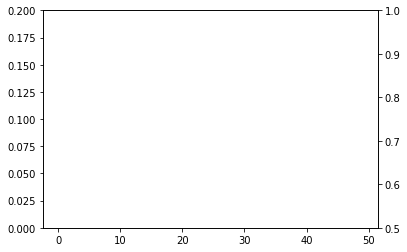

In [252]:
plot_history(
    summary['history'],
    loss_scale=[0, 0.2], met_scale=[0.5, 1]
)

In [206]:
plot_preds(
    summary['preds'],
    config.get('image', 'cmap'),
    out_folder=model_folder
)

pred img saved in /home/stefano/_tmp/_martin/pred_0.png
pred img saved in /home/stefano/_tmp/_martin/pred_1.png
pred img saved in /home/stefano/_tmp/_martin/pred_2.png
pred img saved in /home/stefano/_tmp/_martin/pred_3.png
pred img saved in /home/stefano/_tmp/_martin/pred_4.png
pred img saved in /home/stefano/_tmp/_martin/pred_5.png
pred img saved in /home/stefano/_tmp/_martin/pred_6.png
pred img saved in /home/stefano/_tmp/_martin/pred_7.png
